In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff


# nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# important libraries
from bokeh.plotting import figure
from bokeh.io import output_file, show, output_notebook
from collections import Counter
import spacy
from spacy.util import compounding
from spacy.util import minibatch
from spacy import displacy
import gc
import os

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


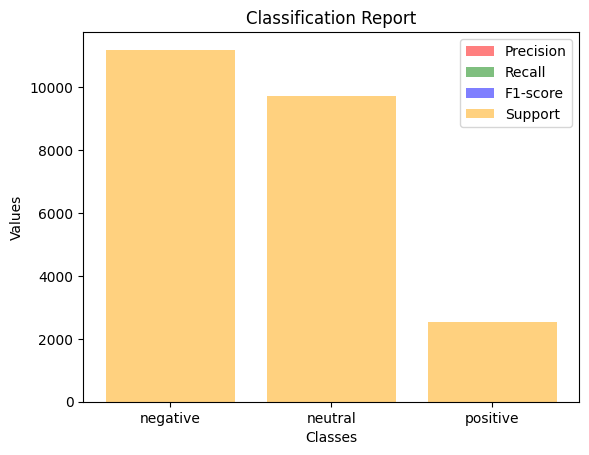

In [3]:
import matplotlib.pyplot as plt

# Class names
classes = ['negative', 'neutral', 'positive']

# Precision values
precision = [0.92, 0.86, 0.92]

# Recall values
recall = [0.92, 0.90, 0.73]

# F1-score values
f1_score = [0.92, 0.88, 0.82]

# Support values
support = [11197, 9725, 2535]

# Plotting
plt.bar(classes, precision, color='red', alpha=0.5)
plt.bar(classes, recall, color='green', alpha=0.5)
plt.bar(classes, f1_score, color='blue', alpha=0.5)
plt.bar(classes, support, color='orange', alpha=0.5)

# Customizing the graph
plt.legend(['Precision', 'Recall', 'F1-score', 'Support'])
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Values')

# Displaying the graph
plt.show()


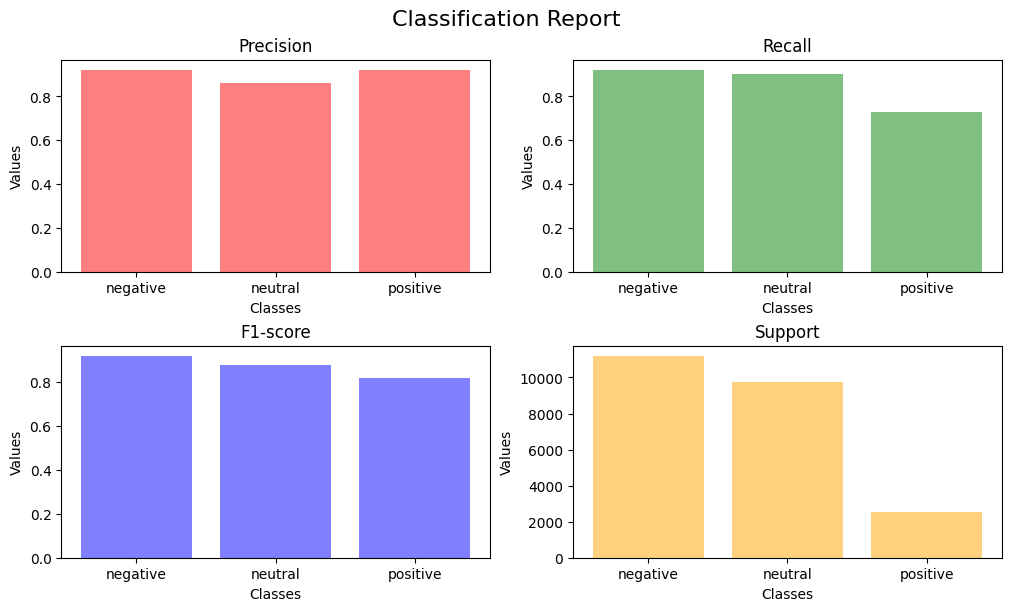

In [4]:
import matplotlib.pyplot as plt

# Class names
classes = ['negative', 'neutral', 'positive']

# Precision values
precision = [0.92, 0.86, 0.92]

# Recall values
recall = [0.92, 0.90, 0.73]

# F1-score values
f1_score = [0.92, 0.88, 0.82]

# Support values
support = [11197, 9725, 2535]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

axs[0, 0].bar(classes, precision, color='red', alpha=0.5)
axs[0, 0].set_title('Precision')
axs[0, 0].set_xlabel('Classes')
axs[0, 0].set_ylabel('Values')

axs[0, 1].bar(classes, recall, color='green', alpha=0.5)
axs[0, 1].set_title('Recall')
axs[0, 1].set_xlabel('Classes')
axs[0, 1].set_ylabel('Values')

axs[1, 0].bar(classes, f1_score, color='blue', alpha=0.5)
axs[1, 0].set_title('F1-score')
axs[1, 0].set_xlabel('Classes')
axs[1, 0].set_ylabel('Values')

axs[1, 1].bar(classes, support, color='orange', alpha=0.5)
axs[1, 1].set_title('Support')
axs[1, 1].set_xlabel('Classes')
axs[1, 1].set_ylabel('Values')

# Customizing the graph
fig.suptitle('Classification Report', fontsize=16)

# Displaying the graph
plt.show()


# Bernoulli

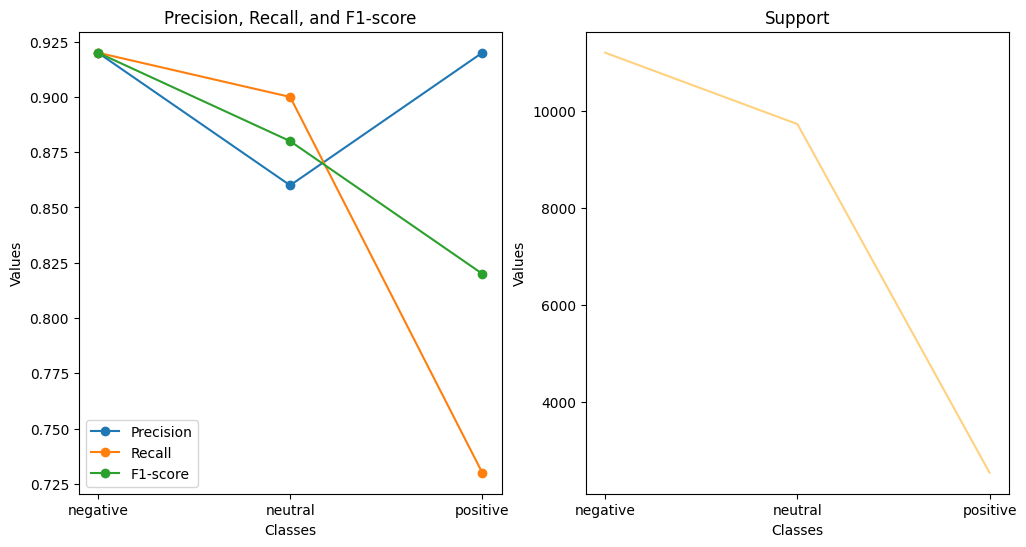

In [5]:
import matplotlib.pyplot as plt

# Class names
classes = ['negative', 'neutral', 'positive']

# Precision values
precision = [0.92, 0.86, 0.92]

# Recall values
recall = [0.92, 0.90, 0.73]

# F1-score values
f1_score = [0.92, 0.88, 0.82]

# Support values
support = [11197, 9725, 2535]

# Subplot 1: Precision, Recall, F1-score
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(classes, precision, marker='o', label='Precision')
axs[0].plot(classes, recall, marker='o', label='Recall')
axs[0].plot(classes, f1_score, marker='o', label='F1-score')
axs[0].set_title('Precision, Recall, and F1-score')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Values')
axs[0].legend()

# Subplot 2: Support
axs[1].plot(classes, support, color='orange', alpha=0.5)
axs[1].set_title('Support')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Values')

# Displaying the graph
plt.show()


# K Nearest Neighbours

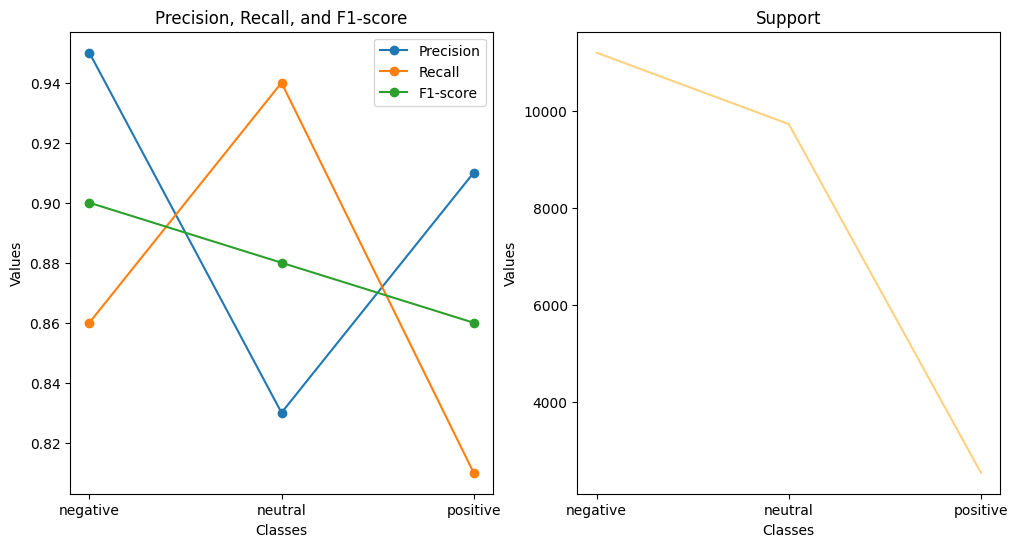

In [6]:
import matplotlib.pyplot as plt

# Class names
classes = ['negative', 'neutral', 'positive']

# Precision values
precision = [0.95, 0.83, 0.91]

# Recall values
recall = [0.86, 0.94, 0.81]

# F1-score values
f1_score = [0.90, 0.88, 0.86]

# Support values
support = [11197, 9725, 2535]

# Subplot 1: Precision, Recall, F1-score
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(classes, precision, marker='o', label='Precision')
axs[0].plot(classes, recall, marker='o', label='Recall')
axs[0].plot(classes, f1_score, marker='o', label='F1-score')
axs[0].set_title('Precision, Recall, and F1-score')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Values')
axs[0].legend()

# Subplot 2: Support
axs[1].plot(classes, support, color='orange', alpha=0.5)
axs[1].set_title('Support')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Values')

# Displaying the graph
plt.show()


# Decision Tree

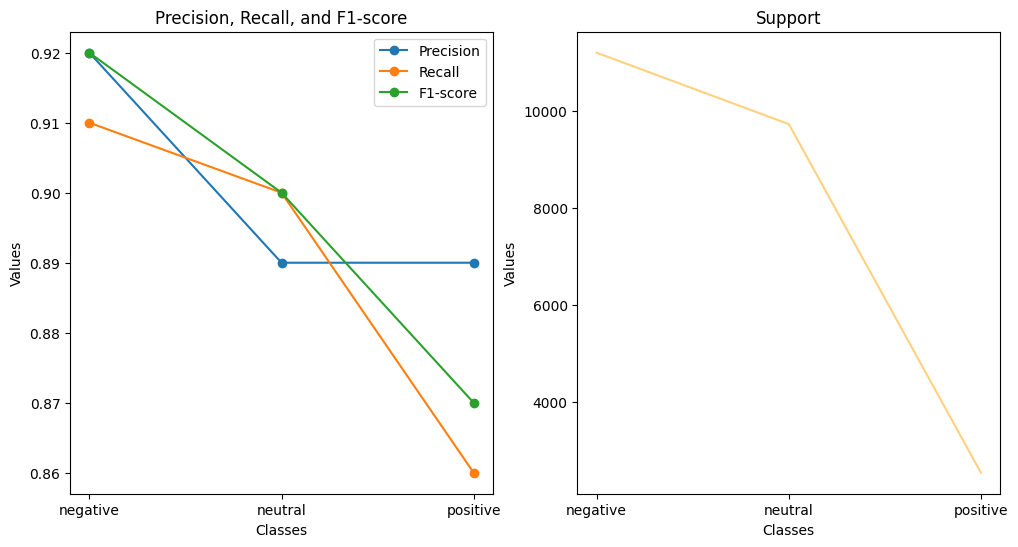

In [7]:
import matplotlib.pyplot as plt

# Class names
classes = ['negative', 'neutral', 'positive']

# Precision values
precision = [0.92, 0.89, 0.89]

# Recall values
recall = [0.91, 0.90, 0.86]

# F1-score values
f1_score = [0.92, 0.90, 0.87]

# Support values
support = [11197, 9725, 2535]

# Subplot 1: Precision, Recall, F1-score
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(classes, precision, marker='o', label='Precision')
axs[0].plot(classes, recall, marker='o', label='Recall')
axs[0].plot(classes, f1_score, marker='o', label='F1-score')
axs[0].set_title('Precision, Recall, and F1-score')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Values')
axs[0].legend()

# Subplot 2: Support
axs[1].plot(classes, support, color='orange', alpha=0.5)
axs[1].set_title('Support')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Values')

# Displaying the graph
plt.show()


# Logistic Regression

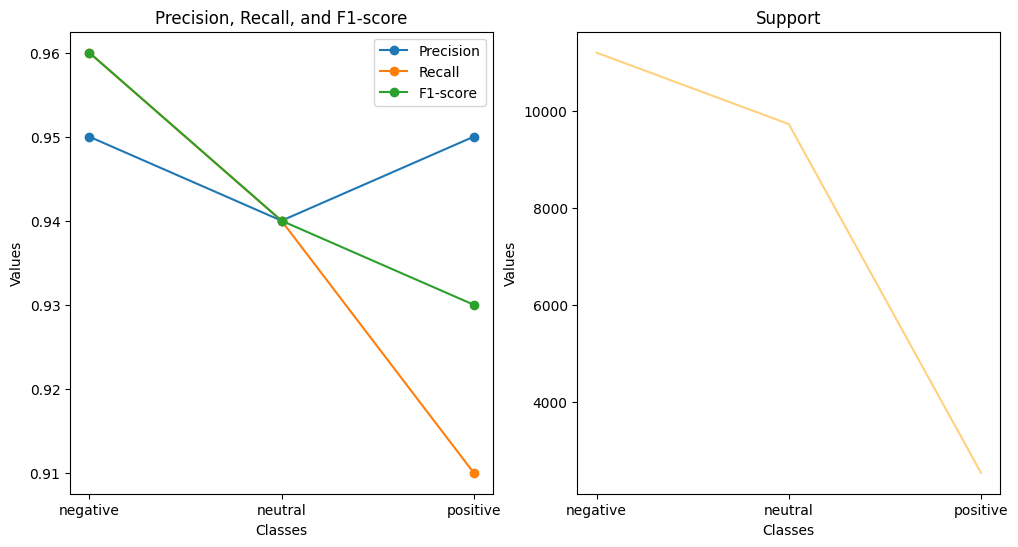

In [8]:
import matplotlib.pyplot as plt

# Class names
classes = ['negative', 'neutral', 'positive']

# Precision values
precision = [0.95, 0.94, 0.95]

# Recall values
recall = [0.96, 0.94, 0.91]

# F1-score values
f1_score = [0.96, 0.94, 0.93]

# Support values
support = [11197, 9725, 2535]

# Subplot 1: Precision, Recall, F1-score
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(classes, precision, marker='o', label='Precision')
axs[0].plot(classes, recall, marker='o', label='Recall')
axs[0].plot(classes, f1_score, marker='o', label='F1-score')
axs[0].set_title('Precision, Recall, and F1-score')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Values')
axs[0].legend()

# Subplot 2: Support
axs[1].plot(classes, support, color='orange', alpha=0.5)
axs[1].set_title('Support')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Values')

# Displaying the graph
plt.show()
